## **Estudios hechos para PM25**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

guardar_imagenes = False

In [2]:
datosContaminantes = pd.read_csv("CSV_Datos_OK.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,12,43.0000,1,1,12,pm25
1,2012-11-27,13,22.0000,1,1,12,pm25
2,2012-11-27,14,31.0000,1,1,12,pm25
3,2012-11-27,15,29.0000,1,1,12,pm25
4,2012-11-27,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...
1185035,2022-07-31,19,10.6495,1,1,86,pm25
1185036,2022-07-31,20,9.4167,1,1,86,pm25
1185037,2022-07-31,21,15.2623,1,1,86,pm25
1185038,2022-07-31,22,16.4119,1,1,86,pm25


Limpieza de los datos para evitar errores y dejarlos ordenados:

In [3]:
# obtener las semanas, los años, los dias y los meses para cada año
def getWeek(df):
    return int( df.strftime('%W') )

def getYear(df):
    return df.year

def getDay(df):
    return df.day

def getMonth(df):
    return df.month

# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

# Funcion para extraer los dias de la semana
def DayOfWeek(df):
    return df.strftime('%A')

# funcion para concatenar dos listas, elemento a elemento
def addLists(firstList, secondList):
    finalList= []
    for i in range( len(firstList) ):
        finalList.append( str(firstList[i]) + '-' + str(secondList[i]) )
    return finalList

In [4]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

# insertando los dias
datosContaminantes.insert(1, "Dia_Semana", np.array( datosContaminantes["Fecha"].apply(DayOfWeek) ) )

# eliminando valores no permitidos
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]

# ordenando y mostrando
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)

datosContaminantes.insert( 1, "año", datosContaminantes["Fecha"].apply(getYear) )
datosContaminantes.insert( 1, "mes", datosContaminantes["Fecha"].apply(getMonth) )
datosContaminantes.insert( 1, "semana", datosContaminantes["Fecha"].apply(getWeek) )
datosContaminantes.insert( 1, "dia", datosContaminantes["Fecha"].apply(getDay) )
datosContaminantes

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,18,38,9,2012,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,18,38,9,2012,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,18,38,9,2012,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,18,38,9,2012,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,18,38,9,2012,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1185035,2022-08-31,31,35,8,2022,Wednesday,19,113.3006,1,1,6,nox
1185036,2022-08-31,31,35,8,2022,Wednesday,20,46.5652,1,1,6,nox
1185037,2022-08-31,31,35,8,2022,Wednesday,21,51.3882,1,1,6,nox
1185038,2022-08-31,31,35,8,2022,Wednesday,22,88.6126,1,1,6,nox


In [21]:
# iteraciones necesarias para completar los promedios por semana
(7*14*53*11)

57134

In [23]:
dfprueba = datosContaminantes[
    (datosContaminantes["año"] == 2012) & \
    (datosContaminantes["semana"] == 38) & \
    (datosContaminantes["estacion"] == 25) & \
    (datosContaminantes["contaminante"] == 'pm25')
]

dfprueba

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,18,38,9,2012,Tuesday,12,16.0,1,1,25,pm25
1,2012-09-18,18,38,9,2012,Tuesday,13,18.0,1,1,25,pm25
2,2012-09-18,18,38,9,2012,Tuesday,14,18.0,1,1,25,pm25
3,2012-09-18,18,38,9,2012,Tuesday,15,17.0,1,1,25,pm25
4,2012-09-18,18,38,9,2012,Tuesday,16,17.0,1,1,25,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
127,2012-09-23,23,38,9,2012,Sunday,19,15.0,1,1,25,pm25
128,2012-09-23,23,38,9,2012,Sunday,20,13.0,1,1,25,pm25
129,2012-09-23,23,38,9,2012,Sunday,21,17.0,1,1,25,pm25
130,2012-09-23,23,38,9,2012,Sunday,22,16.0,1,1,25,pm25


In [24]:
estaciones = datosContaminantes["estacion"].unique()
contaminantes = datosContaminantes["contaminante"].unique()
semanas = np.sort( datosContaminantes["semana"].unique() )
meses = datosContaminantes["mes"].unique()
years = datosContaminantes["año"].unique()

In [25]:
promedio_semana = [];  newYears = [];  newSemanas = [];  newEstaciones = [];  newContaminantes = []

for year in years:
    for semana in semanas:
        for estacion in estaciones:
            for contaminante in contaminantes:
                promedio_semana.append(
                    np.mean(
                        datosContaminantes[
                            (datosContaminantes["año"] == year) & \
                            (datosContaminantes["semana"] == semana) & \
                            (datosContaminantes["estacion"] == estacion) & \
                            (datosContaminantes["contaminante"] == contaminante)
                        ]["valor_contaminante"]
                    )
                )
            newContaminantes += list(contaminantes)
            newEstaciones += len(contaminantes)*[estacion]
            newSemanas += len(contaminantes)*[semana]
            newYears += len(contaminantes)*[year]

In [32]:
# funcion para concatenar dos listas, elemento a elemento
# usada para obtener año-mes
def addLists(firstList, secondList):
    finalList= []
    for i in range( len(firstList) ):
        finalList.append( str(firstList[i]) + '-' + str(secondList[i]) )
    return finalList

promedioSemanalContaminantes = {
    "fecha":addLists(newYears, newSemanas),
    "año":newYears,
    "semana":newSemanas,
    "estacion":newEstaciones,
    "contaminante":newContaminantes,
    "promedio_contaminante":promedio_semana
}

# creacion de dataframe
promedioSemanalContaminantes_df = pd.DataFrame(data=promedioSemanalContaminantes)
promedioSemanalContaminantes_df = promedioSemanalContaminantes_df.dropna()

# ordenando
promedioSemanalContaminantes_df = promedioSemanalContaminantes_df.sort_values(by=['año', 'semana']).reset_index().drop("index", axis=1)

# exportando a csv (descomentar para crear el .csv)
#promedioSemanalContaminantes_df.to_csv('promedioSemanalContaminantes.csv')

promedioSemanalContaminantes_df

,fecha,año,semana,estacion,contaminante,promedio_contaminante
0,2012-38,2012,38,25,pm25,23.757576
1,2012-39,2012,39,25,pm25,24.970238
2,2012-40,2012,40,25,pm25,25.166667
3,2012-41,2012,41,25,pm25,30.071942
4,2012-42,2012,42,25,pm25,21.074468
...,...,...,...,...,...,...
7547,2022-31,2022,31,6,nox,83.362565
7548,2022-32,2022,32,6,nox,71.502226
7549,2022-33,2022,33,6,nox,71.404375
7550,2022-34,2022,34,6,nox,77.548579


Una vez exportado el archivo .csv, será solo cuestión de leerlo para trabajar más cómodamente:

In [7]:
promedioSemanalContaminantes_df = pd.read_csv('promedioSemanalContaminantes.csv').drop('Unnamed: 0', axis=1)

promedioSemanalContaminantes_df

,fecha,año,semana,estacion,contaminante,promedio_contaminante
0,2012-38,2012,38,25,pm25,23.757576
1,2012-39,2012,39,25,pm25,24.970238
2,2012-40,2012,40,25,pm25,25.166667
3,2012-41,2012,41,25,pm25,30.071942
4,2012-42,2012,42,25,pm25,21.074468
...,...,...,...,...,...,...
7547,2022-31,2022,31,6,nox,83.362565
7548,2022-32,2022,32,6,nox,71.502226
7549,2022-33,2022,33,6,nox,71.404375
7550,2022-34,2022,34,6,nox,77.548579


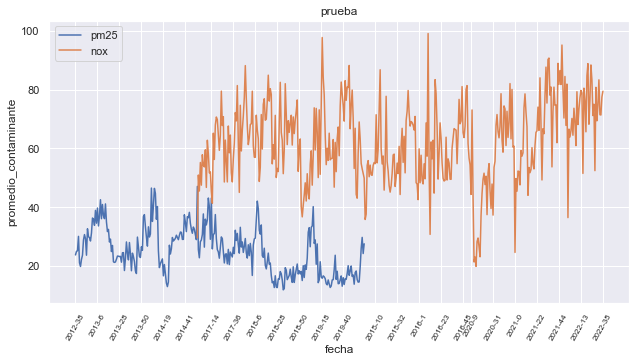

In [56]:
fechas = np.array(promedioSemanalContaminantes_df['fecha'].unique())

eje_horizontal = [
    fechas[i] for i in range(0, len(fechas), 22)
]

sns.set_theme(style="dark")
sns.set(rc={'figure.figsize':(9, 5)})

sns.lineplot(
    data = promedioSemanalContaminantes_df[
        (promedioSemanalContaminantes_df['estacion'] == 25) & \
        (promedioSemanalContaminantes_df['contaminante'] == 'pm25')
    ],
    x = 'fecha',
    y = 'promedio_contaminante',
    ci = False,
    label = 'pm25'
)

sns.lineplot(
    data = promedioSemanalContaminantes_df[
        (promedioSemanalContaminantes_df['estacion'] == 6) & \
        (promedioSemanalContaminantes_df['contaminante'] == 'nox')
    ],
    x = 'fecha',
    y = 'promedio_contaminante',
    ci = False,
    label='nox'
)

plt.xticks(eje_horizontal, fontsize=8, rotation=60)

plt.legend(); plt.tight_layout(); plt.title('prueba')
plt.show()

In [61]:
fechas_para_x = datosContaminantes[['año', 'semana']].copy()

fechas_para_x['año-semana'] = addLists(
    fechas_para_x['año'], fechas_para_x['semana']
)

fechas_para_x

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,18,38,9,2012,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,18,38,9,2012,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,18,38,9,2012,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,18,38,9,2012,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,18,38,9,2012,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1185035,2022-08-31,31,35,8,2022,Wednesday,19,113.3006,1,1,6,nox
1185036,2022-08-31,31,35,8,2022,Wednesday,20,46.5652,1,1,6,nox
1185037,2022-08-31,31,35,8,2022,Wednesday,21,51.3882,1,1,6,nox
1185038,2022-08-31,31,35,8,2022,Wednesday,22,88.6126,1,1,6,nox


### **Extracción y análisis a partir de una muestra aleatoria**

In [5]:
# extraccion de la muestra para PM2.5 y ordenamiento de los datos
muestraPM25 = datosContaminantes[
    datosContaminantes['contaminante'] == 'pm25'
].sample(n=2000).sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)

muestraPM25

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-22,22,38,9,2012,Saturday,22,22.0000,1,1,25,pm25
1,2012-09-24,24,39,9,2012,Monday,7,35.0000,1,1,25,pm25
2,2012-10-03,3,40,10,2012,Wednesday,0,15.0000,1,1,25,pm25
3,2012-10-04,4,40,10,2012,Thursday,10,44.0000,1,1,25,pm25
4,2012-10-06,6,40,10,2012,Saturday,7,38.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-07-23,23,29,7,2022,Saturday,1,20.0000,1,1,12,pm25
1996,2022-07-23,23,29,7,2022,Saturday,5,5.0000,1,1,44,pm25
1997,2022-07-23,23,29,7,2022,Saturday,21,19.0310,1,1,80,pm25
1998,2022-07-25,25,30,7,2022,Monday,14,16.0000,1,1,44,pm25


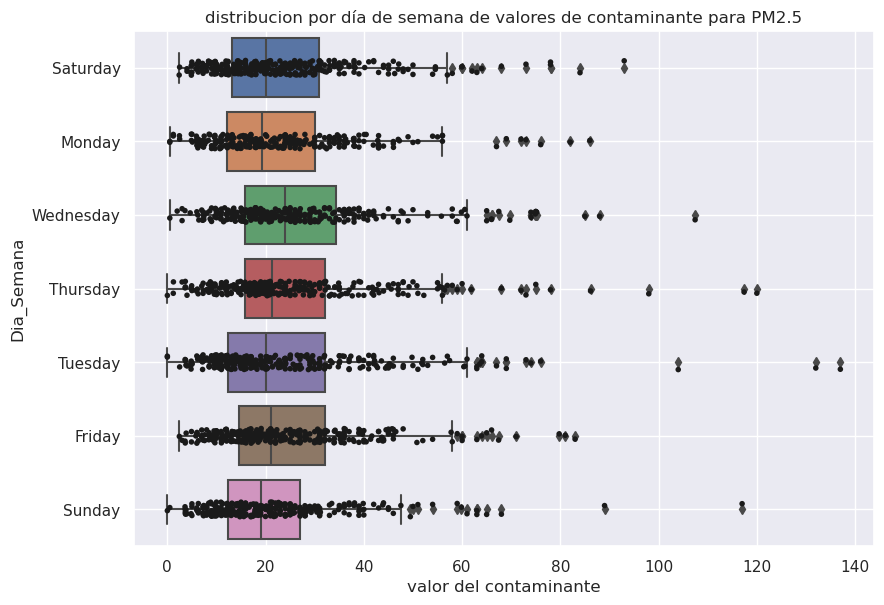

In [7]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraPM25, x='valor_contaminante', y='Dia_Semana')

sns.stripplot(data=muestraPM25, x='valor_contaminante', y='Dia_Semana',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(9, 6)})
plt.xlabel("valor del contaminante"); plt.grid()
plt.tight_layout()
plt.title(f"distribucion por día de semana de valores de contaminante para PM2.5")

# para guardar el plot
if guardar_imagenes:
    plt.savefig('boxplots_contaminantes.png', bbox_inches='tight', dpi=200)

plt.show()

In [32]:
def plotByDay(dia="Friday"):

    dfDia = muestraPM25[ muestraPM25["Dia_Semana"] == dia ].copy()

    dfDia.insert(
        1, "fecha año-semana", addLists( np.array(dfDia["año"]), np.array(dfDia["semana"]) )
    )

    sns.set_theme(style='dark')
    sns.set(rc={'figure.figsize':(9, 5)})

    sns.lineplot(
        data = dfDia,
        x = "fecha año-semana",
        y = "valor_contaminante",
        ci = False,
        alpha = 0.8
    )

    elements = [ np.array(dfDia["fecha año-semana"])[i] for i in range(0, len(dfDia["fecha año-semana"]), 10) ]

    plt.legend(); plt.tight_layout(); plt.grid()
    plt.xticks(elements, fontsize=8, rotation=50)
    plt.title(f"valor del contaminante PM2.5 para el dia {dia} por semanas")
    plt.xlabel("fecha por año-semana"); plt.ylabel("valor del contaminante");

    plt.show()
    
    pass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


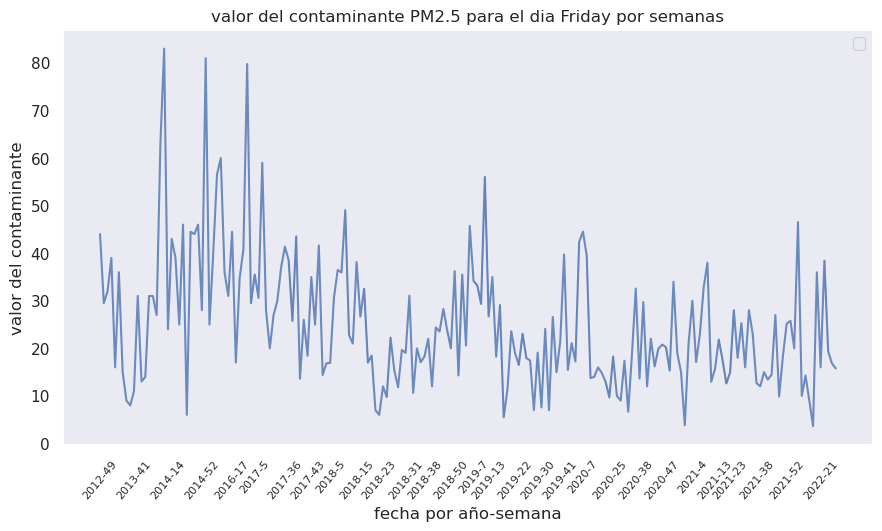

In [36]:
plotByDay(dia="Friday")

In [35]:
muestraPM25["valor_contaminante"].describe()

count    2000.000000
mean       24.502800
std        16.103694
min         0.000000
25%        13.415575
50%        20.846050
75%        31.000000
max       137.000000
Name: valor_contaminante, dtype: float64